In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
train_df = pd.read_csv("train_loan_eligibility.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N
3,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
4,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y


In [4]:
test_df = pd.read_csv('test_loan_eligibility.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural
1,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban
2,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural
3,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural
4,LP001514,Female,Yes,0,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban


In [5]:
## Check null values
train_df.isnull().sum()

Loan_ID               0
Gender               11
Married               3
Dependents            8
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Fill categorical columns with mode (most frequent value)
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [7]:
 # Fill numerical column with mean
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)

In [8]:
# data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            491 non-null    object 
 3   Dependents         491 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      491 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         491 non-null    float64
 9   Loan_Amount_Term   491 non-null    float64
 10  Credit_History     491 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.0+ KB


In [9]:
# show row and column
train_df.shape

(491, 13)

In [10]:
# statistic information
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000
mean,5529.997963,1569.537271,147.309979,341.743381,0.863544
std,6457.784318,2789.523475,85.300510,65.107943,0.343622
min,210.000000,0.000000,9.000000,12.000000,0.000000
25%,2906.000000,0.000000,100.500000,360.000000,1.000000
50%,3859.000000,1032.000000,130.000000,360.000000,1.000000
75%,5825.000000,2241.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
# save clean dataset
train_df.to_csv('cl_train_loan_eligibility.csv')

In [12]:
# # Drop ID (not useful for ML)
# train_df.drop(['Loan_ID'], axis=1, inplace=True)

#  Exploratory Data Analysis (Visuals)

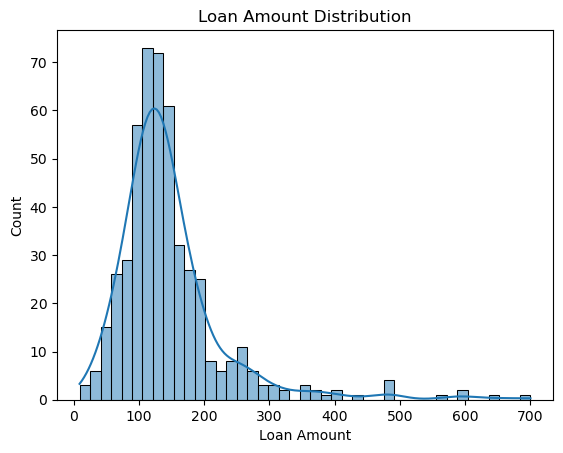

In [14]:
# Loan amount distribution
sns.histplot(train_df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

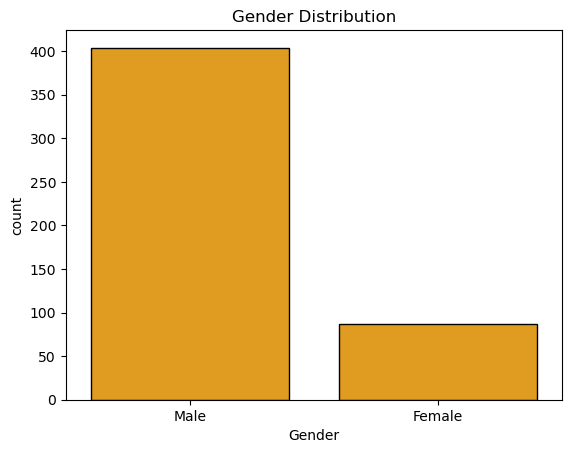

In [15]:
# Distribution of Gender
sns.countplot(data=train_df, x='Gender', color='orange', edgecolor='black')
plt.title("Gender Distribution")
plt.xlabel('Gender')
plt.show()

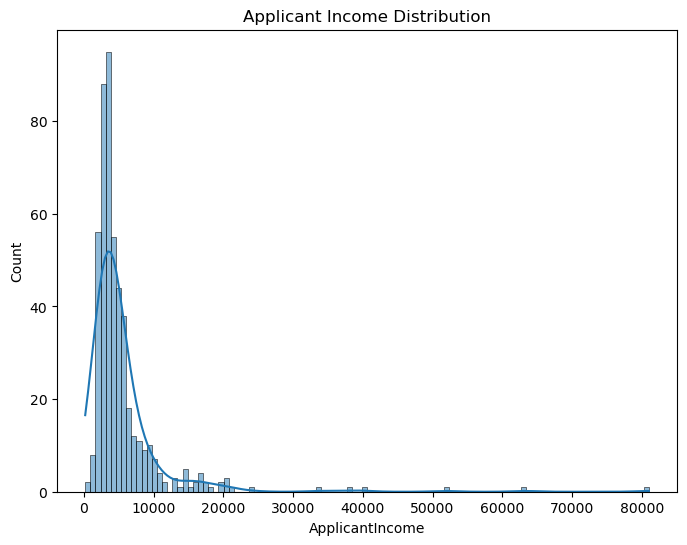

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(train_df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()


###  Loan Amount vs Applicant Income

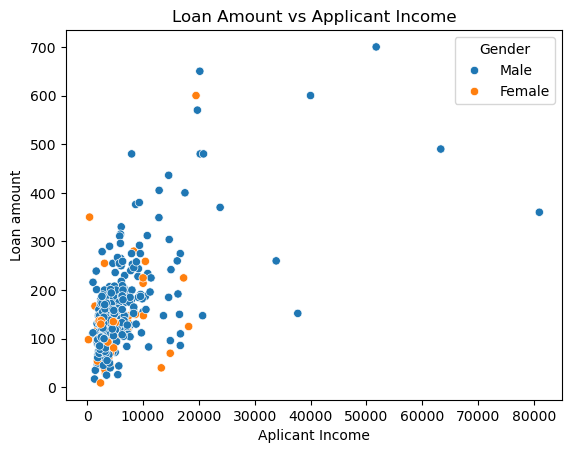

In [18]:
sns.scatterplot(data=train_df, x='ApplicantIncome', y='LoanAmount', hue='Gender')
plt.title("Loan Amount vs Applicant Income")
plt.ylabel('Loan amount')
plt.xlabel('Aplicant Income')
plt.show()


### Total income

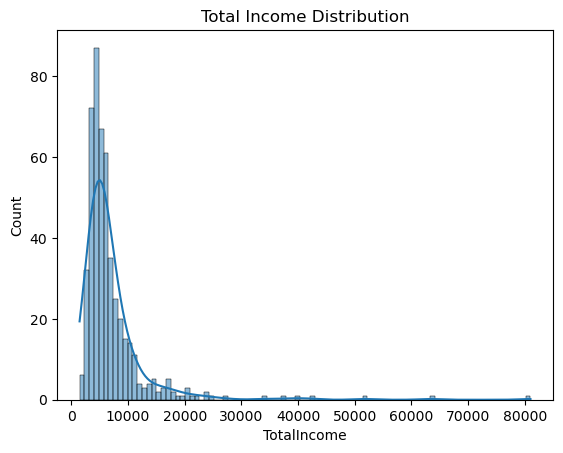

In [20]:
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
sns.histplot(train_df['TotalIncome'], kde=True)
plt.title("Total Income Distribution")
plt.show()

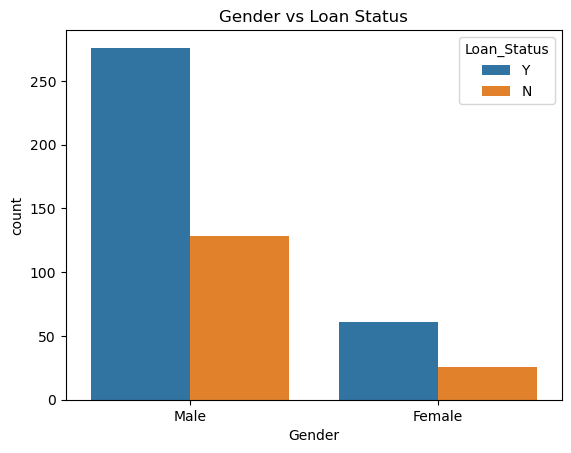

In [21]:
# Visualize categorical features
sns.countplot(x='Gender', hue='Loan_Status', data=train_df)
plt.title("Gender vs Loan Status")
plt.show()

### Correlation Heatmap

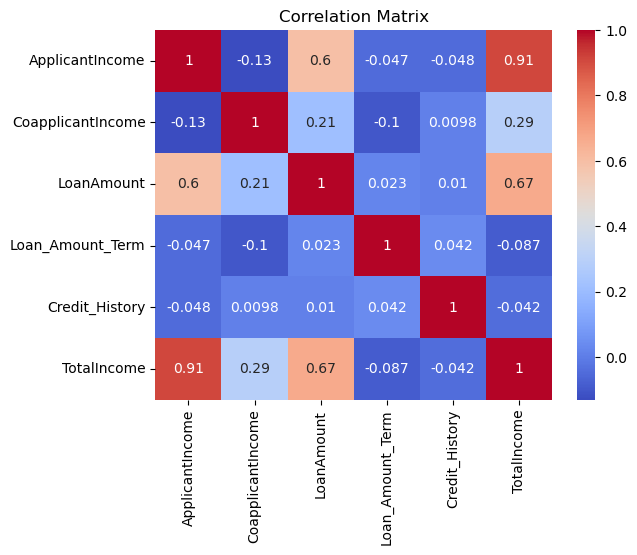

In [23]:
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Average Loan Amount by Education

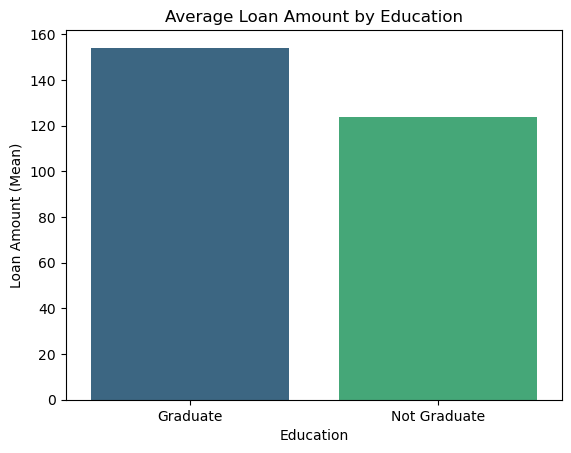

In [25]:
grouped_edu = train_df.groupby("Education")["LoanAmount"].mean().reset_index()

sns.barplot(data=grouped_edu, x='Education', y='LoanAmount', palette='viridis')
plt.title("Average Loan Amount by Education")
plt.ylabel("Loan Amount (Mean)")
plt.show()

### Loan Amount by Gender and Education

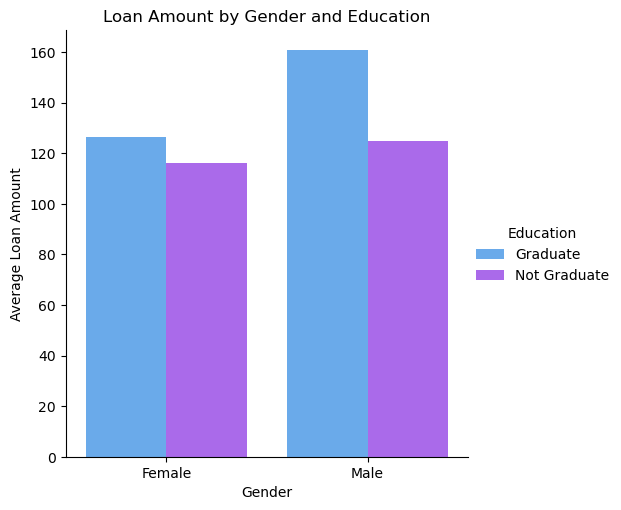

In [27]:
grouped = train_df.groupby(['Gender', 'Education'])['LoanAmount'].mean().reset_index()

sns.catplot(data=grouped, kind='bar', x='Gender', y='LoanAmount', hue='Education', palette='cool')
plt.title("Loan Amount by Gender and Education")
plt.ylabel("Average Loan Amount")
plt.show()

### Total Applicants by Property Area

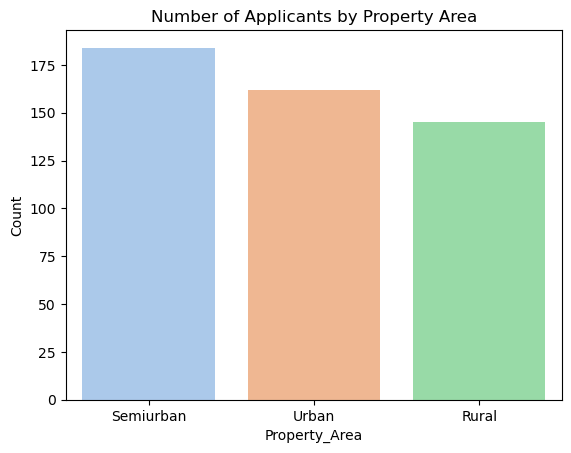

In [29]:
grouped_property = train_df['Property_Area'].value_counts().reset_index()
grouped_property.columns = ['Property_Area', 'Count']

sns.barplot(data=grouped_property, x='Property_Area', y='Count', palette='pastel')
plt.title("Number of Applicants by Property Area")
plt.show()

### Pie Chart: Self Employed vs Not

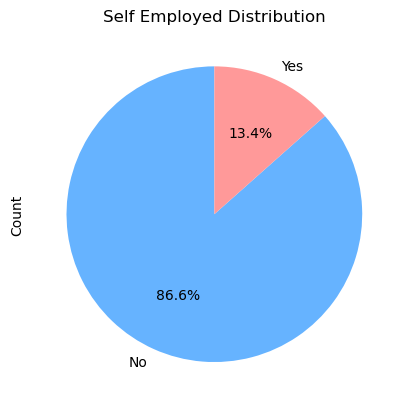

In [31]:
train_df['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Self Employed Distribution")
plt.ylabel('Count')
plt.show()

# Encode Data & Train Model

## Label Encoding

In [34]:
# Label Encoding
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in cols:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])

In [35]:
# Label encode all categorical variables
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    train_df[col] = le.fit_transform(train_df[col])

In [36]:
# Features & Target
x = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status']

In [37]:
# train- test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state= 30)

## Random Forest model

In [39]:
forest_model = RandomForestClassifier()
forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
# Evaluate
y_pred = forest_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification_report:", classification_report(y_test, y_pred))

Accuracy: 0.777027027027027
Classification_report:               precision    recall  f1-score   support

           0       0.73      0.47      0.57        47
           1       0.79      0.92      0.85       101

    accuracy                           0.78       148
   macro avg       0.76      0.69      0.71       148
weighted avg       0.77      0.78      0.76       148



# Predict on test_loan_data

In [42]:
# Label encode (use same encoders!)
# Drop ID and target from training set
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = train_df['Loan_Status']

# Prepare test set
test_processed = test_df.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education'], axis=1)


In [43]:
# train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [44]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001535,1,0,0,0,0,3254,0.0,50.0,360.0,1.0,2,1,3254.0
1,LP001792,1,1,1,0,0,3315,0.0,96.0,360.0,1.0,1,1,3315.0
2,LP002443,1,1,2,0,0,3340,1710.0,150.0,360.0,0.0,0,0,5050.0
3,LP002517,1,1,1,1,0,2653,1500.0,113.0,180.0,0.0,0,0,4153.0
4,LP001894,1,1,0,0,0,2620,2223.0,150.0,360.0,1.0,1,1,4843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP001744,1,0,0,0,0,2971,2791.0,144.0,360.0,1.0,1,1,5762.0
487,LP002138,1,1,0,0,0,2625,6250.0,187.0,360.0,1.0,0,1,8875.0
488,LP001068,1,1,0,0,0,2799,2253.0,122.0,360.0,1.0,1,1,5052.0
489,LP001327,0,1,0,0,0,2484,2302.0,137.0,360.0,1.0,1,1,4786.0


# Save The Model

In [99]:
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF Score:", rf_grid.best_score_)

y_pred_rf = rf_grid.best_estimator_.predict(x_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best RF Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best RF Score: 0.7959505541346973
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.79      0.99      0.88       101

    accuracy                           0.82       148
   macro avg       0.87      0.72      0.74       148
weighted avg       0.84      0.82      0.79       148



In [101]:
# train The model
joblib.dump(rf_grid.best_estimator_, 'rf_model.pkl')

['rf_model.pkl']

In [104]:
# load the model 
rf_model = joblib.load('rf_model.pkl')

In [108]:
# make the prediction
rf_pred = rf_model.predict(x_test)
print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

 Random Forest Accuracy: 0.8175675675675675


In [110]:
#saving the x_test,y_test
import joblib
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [112]:
joblib.dump(x_test, 'x_test.pkl')

['x_test.pkl']